# Answers

In [25]:
import functions # this is the functions module you are writing
from functions import *
import importlib
import numpy as np
import matplotlib.pyplot as plt

## Warning

Jupyter notebooks can be tricky with `git`, especially when multiple people are working on them.  Most of the work in this assignment is in completing `functions.py`, but you may want to be careful to have this notebook backed up before doing any merges so its contents don't get lost.

## Group Information

Briefly state your names, and who did what in the assignment. You can replace the following information:

**Zijian**:  Problem 0 A - C

**Summer**:  Problem 0 D - F

**Yuchien**: Problem 1

**Jinnan**:  Problem 2

## Demo

Note that the way that `__call__` evaluates on strings in `AbstractFunction` lets you do the following:

In [26]:
from functions import Polynomial
p = Polynomial(2,1,1) # 2 x^2 + x + 1
print(p)      # print Polynomail
print(p(1))   # call evaluates polynomial at 1
print(p('x')) # call formats print string with 'x'

2({0})^2 + {0} + 1
4
2(x)^2 + x + 1


you can do the same with

In [27]:
str(p).format('y') # use 'y' instead of 'x'

'2(y)^2 + y + 1'

# Problem 0

## Part A

Question: Test your function by plotting 5*x^2 + 3*x + 1 using the provided Polynomial class

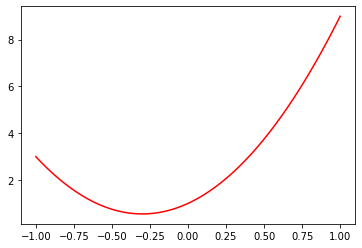

In [28]:
## Your code here
p = Polynomial(5,3,1)
p.plot(color='red')

## Part B
Question: Make plots of Scale(2) and Constant(1) using the plot method.

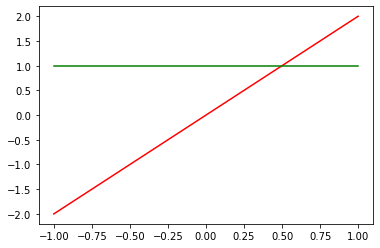

In [29]:
## Your code here
# Make plots of Scale(2) and Constant(1) using the plot method.
p = Scale(2)
p.plot(color='red')

p = Constant(1)
p.plot(color='green')


## Part C

Question: Make a plot of Compose(Polynomial(1,0,0), Polynomial(1,0,0)). What is the equivalent function expressed as a Polynomial?

Answer: x^4.

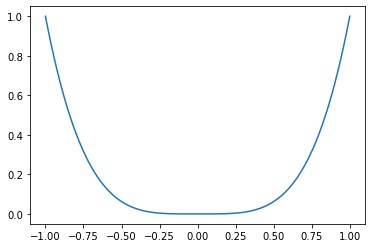

In [30]:
p =  Compose(Polynomial(1,0,0), Polynomial(1,0,0))
p.plot()

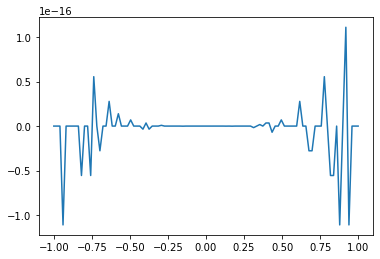

In [31]:
# Numerically verify that (x^2)^2 = x^4
p_err = Sum(p, Polynomial(-1,0,0,0,0))
p_err.plot()

## Part D

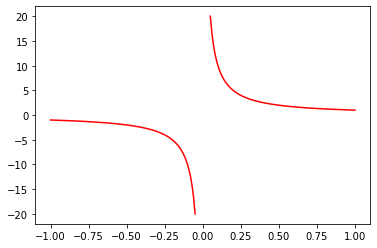

In [32]:
# Make plot for Power
# Vals chosen to avoid singularity at zero
Power(-1).plot(vals=np.linspace(0.05,1,100), color = "red")
Power(-1).plot(vals=np.linspace(-1,-0.05,100), color = "red")

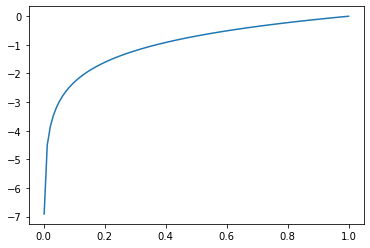

In [33]:
# Make plot for Log
Log().plot(vals=np.linspace(0.001,1,100))

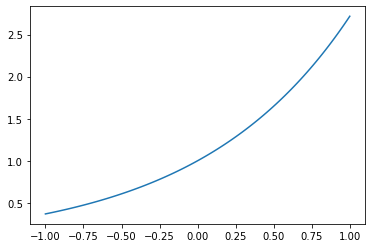

In [34]:
# Make plot for Exponential
Exponential().plot()

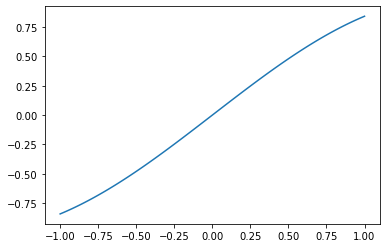

In [35]:
# Make plot for Sin
Sin().plot()

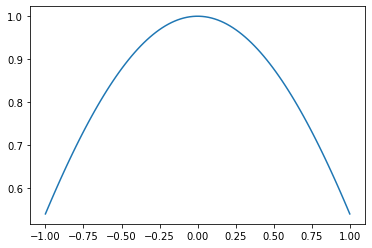

In [36]:
# Make plot for Cos
Cos().plot()

## Part E

In [37]:
## Your code here
# Take the derivative of the product of f and g
print(Product(Symbolic("f"), Symbolic("g")).derivative())
Product(Symbolic("f"), Symbolic("g")).derivative()("x")

(f'({0}))*(g({0}))+(f({0}))*(g'({0}))


"(f'(x))*(g(x))+(f(x))*(g'(x))"

## Part F

1. What is the derivative of `5x^2 + 3x + 1`? 

In [38]:
## Your code here
Polynomial(5, 3, 1).derivative()("x")

'10(x) + 3'

2. Derive a rule for the derivative of $f = g/h$ using symbolic functions.  Does this reduce to quotient rule?

In [39]:
## Your code here
print((Symbolic("g")/Symbolic("h")).derivative())
print((Symbolic("g")/Symbolic("h")).derivative()("x"))

(g'({0}))*((h({0}))^-1)+(g({0}))*((-1((h({0}))^-2))*(h'({0})))
(g'(x))*((h(x))^-1)+(g(x))*((-1((h(x))^-2))*(h'(x)))


(g'(x))*(h(x)^-1)+(g(x))*((-1(h(x)^-2))*(h'(x)))

= (g'(x)h(x) - g(x)h'(x))/(h(x)^2)

Hence, this reduces to quotient rule. 

3. What is the derivative of $\sin(x)^2$?

In [40]:
## Your code here
Power(2)(Sin()(Polynomial(1, 0))).derivative()("x")

'(2((sin(x))^1))*((cos(x))*(1))'

4. What is the second derivative of $e^{5x}$?

In [41]:
## Your code here
Exponential()(Polynomial(5, 0)).derivative().derivative()("x")

'((exponential(5(x)))*(5))*(5)+(exponential(5(x)))*(0)'

# Problem 1

## Part A

1.1447298858494004


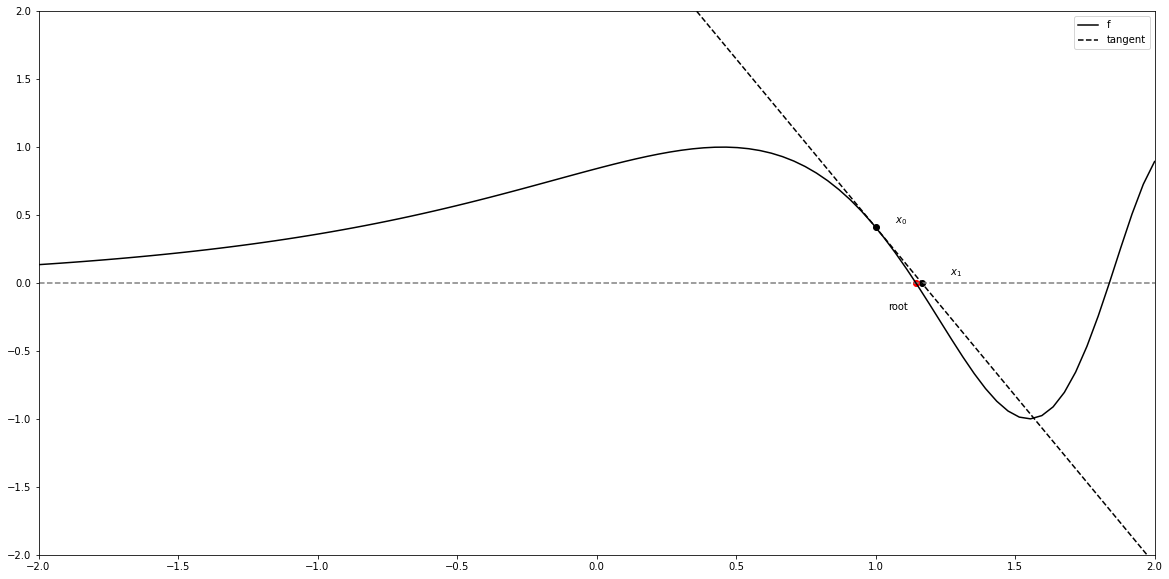

In [42]:
## Your code here
ans=newton_root(Sin()(Exponential()), x0=1.0)
print(ans)

f = Sin()(Exponential())
fp = f.derivative()
xmin, xmax = -2, 2
xs = np.linspace(xmin, xmax, 100)
x0 = 1.0

# Make figure larger
plt.figure(figsize = (20,10))

plt.plot(xs, f(xs), 'k-', label='f')
plt.hlines(0, xmin, xmax, colors='gray', linestyles='dashed')
plt.scatter(x0, f(x0), c='k')
plt.text(x0 + 0.07, f(x0) + 0.03, r'$x_0$')
x1 = x0 - f(x0)/fp(x0)
plt.plot(xs, fp(x0)*(xs - x1), 'k--', label='tangent')
plt.scatter(x1, 0, c='k')
plt.text(x1 + 0.1, +0.06, r'$x_1$')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
# Visualize the root
plt.scatter(ans, 0, color = "red")
plt.text(ans-0.1, - 0.2, 'root')
plt.legend()
plt.show()

## Part B

1.5501949943225588


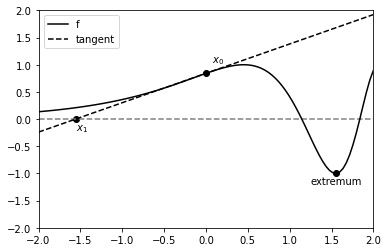

In [43]:
## Your code here
ans = newton_extremum(Sin()(Exponential()), x0=0.0)
print(ans)     

f = Sin()(Exponential())
fp = f.derivative()
xmin, xmax = -2, 2
xs = np.linspace(xmin, xmax, 100)
x0 = 0.0
plt.plot(xs, f(xs), 'k-', label='f')
plt.hlines(0, xmin, xmax, colors='gray', linestyles='dashed')
plt.scatter(x0, f(x0), c='k')
plt.text(x0 + 0.07, f(x0) + 0.2, r'$x_0$')
x1 = x0 - f(x0)/fp(x0)
plt.plot(xs, fp(x0)*(xs - x1), 'k--', label='tangent')
plt.scatter(x1, 0, c='k')
plt.text(x1 + 0.004, -0.2, r'$x_1$')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.legend()
# Visualize the extremum
plt.scatter(ans, f(ans), c='k')
plt.text(ans-0.3, f(ans) - 0.2, 'extremum')
plt.show()

# Problem 2

## Part A

You don't need any code in this notebook - it goes in `functions.py`

## Part B

Text(0.5, 1.0, 'taylor series of Sin(x) centered at x=0')

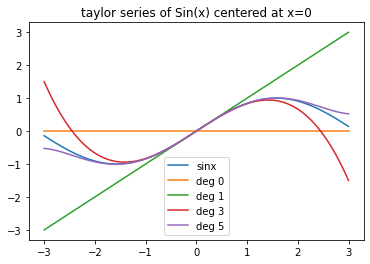

In [65]:
## Your code here
x = np.linspace(-3, 3, 100)
plt.plot(x, np.sin(x), label=f'sinx')
for deg in [0,1,3,5]:
    plt.plot(x, Sin().taylor_series(0,deg).evaluate(np.array(x)), label='deg {}'.format(deg), )
plt.legend()
plt.title('taylor series of Sin(x) centered at x=0')

# Feedback